In [2]:
# First import necessary modules and initialize BinanceTrader
from binancetrader_class import BinanceTrader  # your existing file
from RSI_MA_strategy_binaryoptions_module import TradeConfig, TradingStrategy
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import logging

In [4]:
# Initialize your trader (assuming you have your credentials file)
filePath = 'envBinance.json'
trader = BinanceTrader(filePath)

Connection successful.


In [6]:
# Update the symbol data
trader.update_ohlc_alltimeframes(symbol='BTCUSDT')

Updating values for symbol: BTCUSDT and timeframe: MN1.
Dados de tempo e colunas iniciadas. Iniciando funcao binance_update_ohlc.
Arquivo ja existe. Lendo o arquivo parquet e iniciando o dataframe.
Diferenca do ultimo registro pra hoje e anterior ao timeframe declarado. Atualizando a partir do ultimo registro
Total de linhas importadas: 2
Concatenando dados.
Salvando arquivo final em binancedata\ohlc\MN1\BTCUSDT_MN1.parquet. 

Updating values for symbol: BTCUSDT and timeframe: W1.
Dados de tempo e colunas iniciadas. Iniciando funcao binance_update_ohlc.
Arquivo ja existe. Lendo o arquivo parquet e iniciando o dataframe.
Diferenca do ultimo registro pra hoje e anterior ao timeframe declarado. Atualizando a partir do ultimo registro
Total de linhas importadas: 5
Concatenando dados.
Salvando arquivo final em binancedata\ohlc\W1\BTCUSDT_W1.parquet. 

Updating values for symbol: BTCUSDT and timeframe: D3.
Dados de tempo e colunas iniciadas. Iniciando funcao binance_update_ohlc.
Arquivo ja e

In [8]:
# Create configuration for the strategy
config = TradeConfig(
    initial_capital=2000,
    base_bet_size=10,
    rsi_period=14,
    rsi_ma_period=14,
    risk_per_trade_pct=1.0, # Risk is 1% of the current capital
    option_return_pct=80.0
)

# Initialize the strategy
strategy = TradingStrategy(config)

# Define your backtest period
start_date = datetime(2023, 1, 1)  # Start with a recent period first
end_date = datetime(2024, 11, 23)

# Initialize results storage
monthly_results = []

In [12]:
# Run the backtest
current_date = start_date
while current_date <= end_date:
    month_start = current_date
    month_end = (month_start + timedelta(days=32)).replace(day=1) - timedelta(days=1)
    
    # Get data for the month
    df = trader.read_ohlc(
        symbol='BTCUSDT',
        timeframe='M5',
        initial_date=month_start,
        final_date=month_end
    )
    
    # Calculate RSI using your existing method
    df = trader.calculate_rsi(df, rsi_period=14, ma_type="SMA", ma_period=14)
    
    # Process month
    result = strategy.process_month(df)
    if result:
        result['month'] = month_start.strftime('%Y-%m')
        monthly_results.append(result)
        
    current_date = month_end + timedelta(days=1)

# Convert results to DataFrame
results_df = pd.DataFrame(monthly_results)

# Print summary statistics
print("\nBacktest Results:")
print(f"Total Return: ${results_df['return'].sum():.2f}")
print(f"Average Monthly Return: ${results_df['return'].mean():.2f}")
print(f"Average Win Rate: {results_df['win_rate'].mean():.2f}%")
print(f"Average Sharpe Ratio: {results_df['sharpe_ratio'].mean():.2f}")
print(f"Maximum Drawdown: {results_df['max_drawdown'].max():.2f}%")


Backtest Results:
Total Return: $-2000.00
Average Monthly Return: $-43.48
Average Win Rate: 49.82%
Average Sharpe Ratio: 0.00
Maximum Drawdown: -0.48%


In [14]:
results_df

,return,trades,win_rate,avg_trade_return,sharpe_ratio,max_drawdown,month
0,-3668.000000,1825,49.972603,-2.009863e+00,-11.719310,-58.312500,2023-01
1,2822.256000,1602,50.312110,1.761708e+00,12.085372,-inf,2023-02
2,-3146.501856,1783,46.999439,-1.764723e+00,-17.819788,-59.375000,2023-03
3,5486.645087,1671,53.441053,3.283450e+00,21.311414,-0.480000,2023-04
4,-11021.335176,1882,46.068013,-5.856182e+00,-21.500161,-inf,2023-05
5,22686.184937,1704,54.166667,1.331349e+01,18.214043,-inf,2023-06
6,-37928.440978,1793,47.183491,-2.115362e+01,-17.100899,-inf,2023-07
7,16803.663686,1686,46.085409,9.966586e+00,5.362761,-2.800000,2023-08
8,8936.361394,1750,48.742857,5.106492e+00,9.919392,-0.500000,2023-09
9,-8918.440947,1797,45.965498,-4.962961e+00,-26.250338,-inf,2023-10


2024-12-17 21:55:48,957 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-17 21:55:48,963 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


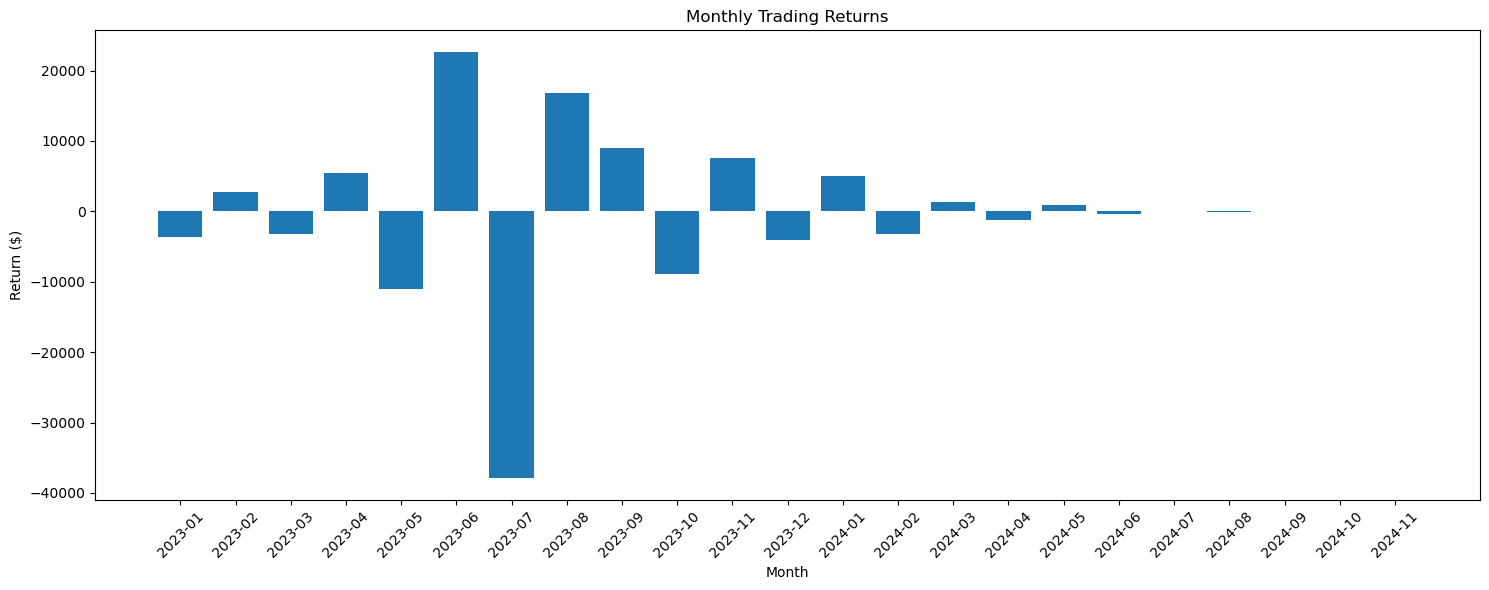

In [16]:
# Plot monthly returns
plt.figure(figsize=(15, 6))
plt.bar(results_df['month'], results_df['return'])
plt.title('Monthly Trading Returns')
plt.xlabel('Month')
plt.ylabel('Return ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2024-12-17 21:55:52,015 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-17 21:55:52,019 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


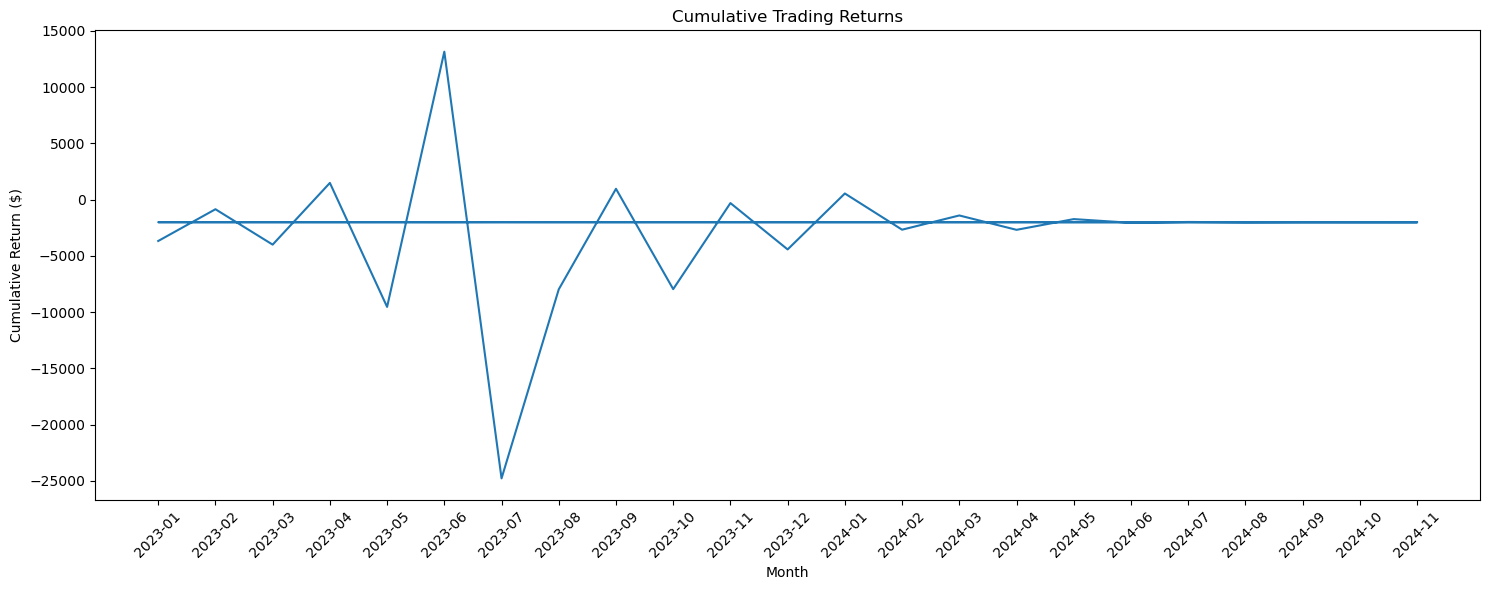

In [18]:
# Plot cumulative returns
plt.figure(figsize=(15, 6))
plt.plot(results_df['month'], results_df['return'].cumsum())
plt.title('Cumulative Trading Returns')
plt.xlabel('Month')
plt.ylabel('Cumulative Return ($)')
plt.xticks(rotation=45)
plt.tight_layout()
start_date = datetime(2023, 1, 1)  # Start with a recent period first
end_date = datetime(2024, 11, 23)
plt.show()

In [51]:
start_date = datetime(2024, 11, 1)  # Start with a recent period first
end_date = datetime(2024, 11, 23)
# Get data for the month
df = trader.read_ohlc(
    symbol='BTCUSDT',
    timeframe='M5',
    initial_date=month_start,
    final_date=month_end
)

# Calculate RSI using your existing method
df = trader.calculate_rsi(df, rsi_period=14, ma_type="SMA", ma_period=14)

# Initialize position tracking
position = 0
entry_price = 0
monthly_trades = []
current_capital = config.initial_capital
# Add shifted columns for crossover detection
df['RSI_prev'] = df['RSI'].shift(1)
df['RSI_MA_prev'] = df['RSI_MA'].shift(1)

# Process signals
for idx, row in df.iterrows():
    position_size = current_capital * (config.risk_per_trade_pct / 100) # Basically not doing anythin
    # So the trades df range doesn't get out of df range
    if idx == df.index.values[-1:]:
        break
    # Process new signals
    if position == 0 and (row['RSI'] > row['RSI_MA'] and row['RSI_prev'] < row['RSI_MA_prev']):
        
        monthly_trades.append({
            'timestamp': idx,
            'price': row['close'],
            'quantity': position_size,
            'type': 'entrada_comprado'
        })
        monthly_trades.append({
            'timestamp': idx + timedelta(minutes=5),
            'price': 0.0,
            'quantity': position_size,
            'type': 'saida_comprado'
        })
        position = 1
        
    elif position > 0 and (row['RSI'] < row['RSI_MA'] and row['RSI_prev'] > row['RSI_MA_prev']):
        monthly_trades.append({
            'timestamp': idx,
            'price': row['close'],
            'quantity': position_size,
            'type': 'entrada_vendido'
        })
        monthly_trades.append({
            'timestamp': idx + timedelta(minutes=5),
            'price': 0.0,
            'quantity': position_size,
            'type': 'saida_vendido'
        })
        position = 0


        
trades_df = pd.DataFrame(monthly_trades)        
# Fixing Exit Prices
# Temporarily set 'timestamp' as the index for trades_df
trades_df.set_index('timestamp', inplace=True)
# Identify rows in trades_df where price == 0
rows_to_update = trades_df['price'] == 0.0
# Replace these rows with the corresponding values from df
trades_df.loc[rows_to_update, 'price'] = df.loc[trades_df.index[rows_to_update], 'close']
# Reset the index back to 'timestamp'
trades_df.reset_index(inplace=True)

# Shift prices for calculating trade PnL
trades_df['prev_price'] = trades_df['price'].shift(1)
trades_df['price_change'] = trades_df['price']-trades_df['prev_price']

# PnL calculation (using dollar-based positions)
# Ensure required columns exist
trades_df['pnl'] = 0.0  # Initialize PnL column

# Handle 'saida_comprado' type trades
trades_df.loc[
    (trades_df['type'] == 'saida_comprado') & (trades_df['price_change'] > 0), # Given these conditions
    'pnl' # Populate this column
] = trades_df['quantity'] * (config.option_return_pct / 100)

trades_df.loc[
    (trades_df['type'] == 'saida_comprado') & (trades_df['price_change'] < 0),
    'pnl'
] = -trades_df['quantity']

# Handle 'saida_vendido' type trades
trades_df.loc[
    (trades_df['type'] == 'saida_vendido') & (trades_df['price_change'] < 0),
    'pnl'
] = trades_df['quantity'] * (config.option_return_pct / 100)

trades_df.loc[
    (trades_df['type'] == 'saida_vendido') & (trades_df['price_change'] > 0),
    'pnl'
] = -trades_df['quantity']
# Verify pnl validity
if 'pnl' not in trades_df.columns or trades_df['pnl'].isna().all():
    raise ValueError("Invalid 'pnl' column in trades_df.")

# Total return
total_return = trades_df['pnl'].sum()
# Number of trades
num_trades = len(trades_df[trades_df['type'].isin(['saida_comprado', 'saida_vendido'])])

# Winning trades (PnL > 0)
winning_trades = len(trades_df[trades_df['pnl'] > 0])

# Updating the current capital after trades
current_capital += total_return

# Win rate (percentage of trades with positive PnL)
win_rate = (winning_trades / num_trades * 100) if num_trades > 0 else 0

# Average return per trade
avg_trade_return = total_return / num_trades if num_trades > 0 else 0

# Calculate Sharpe ratio based on daily PnL
# Resample PnL to daily intervals and calculate the Sharpe ratio
daily_returns = trades_df.set_index('timestamp')['pnl'].resample('D').sum()
sharpe_ratio = np.sqrt(252) * daily_returns.mean() / daily_returns.std() if len(daily_returns) > 1 else 0

# Calculate maximum drawdown
cumulative_pnl = trades_df['pnl'].cumsum()

In [49]:
trades_df[trades_df['pnl'] < 0]

,timestamp,price,quantity,type,prev_price,price_change,pnl
1,2024-11-01 01:45:00,69784.00,20.0,saida_comprado,69929.78,-145.78,-20.0
11,2024-11-01 05:10:00,69553.96,20.0,saida_vendido,69542.29,11.67,-20.0
13,2024-11-01 05:20:00,69593.99,20.0,saida_comprado,69600.00,-6.01,-20.0
15,2024-11-01 05:50:00,69602.69,20.0,saida_vendido,69592.00,10.69,-20.0
17,2024-11-01 06:05:00,69522.01,20.0,saida_comprado,69644.01,-122.00,-20.0
...,...,...,...,...,...,...,...
2903,2024-11-27 00:35:00,92120.03,20.0,saida_vendido,92100.00,20.03,-20.0
2905,2024-11-27 01:05:00,91982.00,20.0,saida_comprado,92102.49,-120.49,-20.0
2907,2024-11-27 01:10:00,92296.02,20.0,saida_vendido,91982.00,314.02,-20.0
2915,2024-11-27 02:35:00,92851.97,20.0,saida_vendido,92763.66,88.31,-20.0


In [53]:
print("\nBacktest Results:")
print(f"Total Return: ${trades_df['pnl'].sum():.2f}")
print(f"Average Monthly Return: ${trades_df['pnl'].mean():.2f}")
print(f"Average Win Rate: {win_rate}%")
print(f"Average Sharpe Ratio: {sharpe_ratio}")
print(f"Daily return: {daily_returns}%")


Backtest Results:
Total Return: $-2196.00
Average Monthly Return: $-0.75
Average Win Rate: 51.33653187114462%
Average Sharpe Ratio: -11.473447776830078
Daily return: timestamp
2024-11-01     44.0
2024-11-02   -152.0
2024-11-03    144.0
2024-11-04    -96.0
2024-11-05    112.0
2024-11-06   -116.0
2024-11-07      4.0
2024-11-08    -52.0
2024-11-09   -228.0
2024-11-10    -40.0
2024-11-11      4.0
2024-11-12    -32.0
2024-11-13    -52.0
2024-11-14   -208.0
2024-11-15    -88.0
2024-11-16      0.0
2024-11-17   -128.0
2024-11-18     -4.0
2024-11-19    -88.0
2024-11-20    -68.0
2024-11-21   -388.0
2024-11-22   -148.0
2024-11-23   -288.0
2024-11-24   -140.0
2024-11-25    -76.0
2024-11-26    -56.0
2024-11-27    -56.0
Freq: D, Name: pnl, dtype: float64%
